In [1]:
%cd ..

C:\Users\ilyap\dev\python\python


In [2]:
from investments import moex
from investments import instruments as i
import numpy as np
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib notebook

In [4]:
sns.set()

In [5]:
usd=moex.FXInstrument("USD000UTSTOM")
eur=moex.FXInstrument("EUR_RUB__TOM")
realty=moex.IndexInstrument("MREDC")
hakas=moex.BondInstrument("RU000A0JWXQ7")

In [6]:
usd_ohlc = i.OHLCSeries.load_from_csv("investments/data/USD000UTSTOM.csv")
eur_ohlc = i.OHLCSeries.load_from_csv("investments/data/EUR_RUB__TOM.csv")
realty_ohlc = i.OHLCSeries.load_from_csv("investments/data/MREDC.csv")
hakas_ohlc = i.OHLCSeries.load_from_csv("investments/data/RU000A0JWXQ7.csv")

In [20]:
num_devs=2
usd_m=usd_ohlc.mean_of_last_elems(10)
usd_dev=usd_ohlc.std_dev_of_last_elems(10)
(usd_m-num_devs*usd_dev,usd_m,usd_m+num_devs*usd_dev)

(73.42552939290294, 74.21475000000001, 75.00397060709707)

In [21]:
usd.update_ohlc_table(usd_ohlc)
eur.update_ohlc_table(eur_ohlc)
realty.update_ohlc_table(realty_ohlc)
hakas.update_ohlc_table(hakas_ohlc)

2021-03-06 11:14:30,024 INFO investments.moex Loading USDRUB_TOM (USD000UTSTOM) from 2021-03-06
2021-03-06 11:14:30,259 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2021-03-06
2021-03-06 11:14:30,360 INFO investments.moex Loading Индекс недвиж-ти ДомКлик Москва (MREDC) from 2021-03-04
2021-03-06 11:14:30,461 INFO investments.moex Loading Хакас2016 (RU000A0JWXQ7) from 2021-03-06


In [14]:
df_usd=pd.DataFrame(usd_ohlc.ohlc_series)
df_usd["date"]=pd.to_datetime(df_usd.date)
df_usd=df_usd.set_index("date")
df_eur=pd.DataFrame(eur_ohlc.ohlc_series)
df_eur.date=pd.to_datetime(df_eur.date)
df_eur=df_eur.set_index("date")
df_realty=pd.DataFrame(realty_ohlc.ohlc_series)
df_realty.date=pd.to_datetime(df_realty.date)
df_realty=df_realty.set_index("date")

In [25]:
df_usd["2020-03":"2020-05"]

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2020-03-02,66.6775,67.3300,66.1000,66.4425,90636,3.907099e+11,66.7019
2020-03-03,66.1750,66.6725,65.3000,66.0400,76160,3.364008e+11,66.2100
2020-03-04,65.9200,66.5400,65.5100,66.2600,60063,2.748354e+11,65.9498
2020-03-05,65.9975,67.7850,65.9750,67.6200,66332,2.864774e+11,66.6566
2020-03-06,67.6125,68.5950,67.3325,68.5725,83724,3.777625e+11,67.9865
...,...,...,...,...,...,...,...
2020-05-25,71.5300,71.8475,71.4075,71.6500,30679,1.251461e+11,71.6102
2020-05-26,71.1850,71.4850,70.6050,70.7800,54287,1.848153e+11,70.9380
2020-05-27,71.0675,71.4850,70.7925,71.0100,47410,2.107312e+11,71.0865


In [43]:
df_usd.groupby([df_usd.index.year,df_usd.index.dayofweek])["volume"].median().unstack()

date,0,1,2,3,4,5,6
date,,,,,,,
2003,2.242793e+09,3.136168e+09,2.394308e+09,2.999473e+09,1.987744e+09,7.859654e+08,NaN
2004,8.291281e+09,7.812355e+09,8.374433e+09,8.259706e+09,8.427794e+09,NaN,NaN
2005,2.613958e+10,2.754211e+10,2.503993e+10,2.403750e+10,2.831886e+10,5.295566e+09,NaN
2006,3.201710e+10,3.621572e+10,3.586700e+10,3.949175e+10,4.719013e+10,1.190853e+10,2.246022e+10
2007,4.794403e+10,5.219265e+10,5.450988e+10,5.621795e+10,5.864355e+10,1.231554e+10,NaN
2008,7.837814e+10,9.082975e+10,9.742565e+10,9.461864e+10,9.139214e+10,1.630777e+10,2.280390e+10
2009,8.720347e+10,1.030449e+11,9.072547e+10,9.927578e+10,9.528916e+10,NaN,8.817336e+10
2010,8.542291e+10,1.164385e+11,1.124790e+11,1.118899e+11,1.099229e+11,1.513414e+10,NaN
2011,1.028992e+11,1.220516e+11,1.219547e+11,1.429284e+11,1.192779e+11,2.462323e+10,NaN


In [49]:
df_usd.pivot_table("volume", index=df_usd.index.year, columns=df_usd.index.dayofweek, aggfunc="median")

date,0,1,2,3,4,5,6
date,,,,,,,
2003,2.242793e+09,3.136168e+09,2.394308e+09,2.999473e+09,1.987744e+09,7.859654e+08,NaN
2004,8.291281e+09,7.812355e+09,8.374433e+09,8.259706e+09,8.427794e+09,NaN,NaN
2005,2.613958e+10,2.754211e+10,2.503993e+10,2.403750e+10,2.831886e+10,5.295566e+09,NaN
2006,3.201710e+10,3.621572e+10,3.586700e+10,3.949175e+10,4.719013e+10,1.190853e+10,2.246022e+10
2007,4.794403e+10,5.219265e+10,5.450988e+10,5.621795e+10,5.864355e+10,1.231554e+10,NaN
2008,7.837814e+10,9.082975e+10,9.742565e+10,9.461864e+10,9.139214e+10,1.630777e+10,2.280390e+10
2009,8.720347e+10,1.030449e+11,9.072547e+10,9.927578e+10,9.528916e+10,NaN,8.817336e+10
2010,8.542291e+10,1.164385e+11,1.124790e+11,1.118899e+11,1.099229e+11,1.513414e+10,NaN
2011,1.028992e+11,1.220516e+11,1.219547e+11,1.429284e+11,1.192779e+11,2.462323e+10,NaN


In [35]:
df_usd[df_usd.index.dayofweek>5]

,open,high,low,close,num_trades,volume,waprice,day of week
date,,,,,,,,
2006-02-26,28.2000,28.2000,28.1101,28.1125,545,2.246022e+10,28.1446,7
2008-05-04,23.8199,23.8199,23.7900,23.7950,371,2.280390e+10,23.7946,7
2009-01-11,30.8600,30.8600,30.4901,30.5300,1024,8.817336e+10,30.5312,7
2012-03-11,29.5499,29.5874,29.4700,29.5200,3907,3.182951e+10,29.5465,7


In [24]:
df_realty.describe()

,open,high,low,close,num_trades,volume,waprice
count,215.000000,215.000000,215.000000,215.000000,215.0,215.0,215.0
mean,172176.617860,172180.838605,172176.617860,172180.838605,1.0,0.0,0.0
std,14293.390101,14301.268060,14293.390101,14301.268060,0.0,0.0,0.0
min,155408.840000,155408.840000,155408.840000,155408.840000,1.0,0.0,0.0
25%,158497.340000,158497.340000,158497.340000,158497.340000,1.0,0.0,0.0
50%,169428.080000,169428.080000,169428.080000,169428.080000,1.0,0.0,0.0
75%,182471.895000,182471.895000,182471.895000,182471.895000,1.0,0.0,0.0
max,209347.500000,209347.500000,209347.500000,209347.500000,1.0,0.0,0.0


In [18]:
df_eur.describe()

,open,high,low,close,num_trades,volume,waprice
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3.902000e+03,3902.000000
mean,53.002069,53.287807,52.722910,52.998242,2920.778831,1.514331e+10,52.998550
std,17.293793,17.523086,17.087295,17.297334,3244.124465,1.247624e+10,17.298166
min,33.320100,33.345000,33.000000,33.330000,9.000000,2.053429e+07,33.331400
25%,39.040625,39.140000,38.960650,39.028125,439.250000,5.631243e+09,39.036100
50%,43.975000,44.127750,43.850000,43.965000,1278.500000,1.254788e+10,43.979800
75%,70.501875,70.853125,70.141875,70.488125,5187.750000,2.267846e+10,70.498225
max,93.615000,100.740000,92.952500,93.775000,23195.000000,1.061776e+11,93.722200


In [50]:
medians_usd=[(year,
  df_usd[date(year,12,20):date(year,12,31)]["close"].median(),
  df_usd[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2003,2021)]
medians_eur=[(year,
  df_eur[date(year,12,20):date(year,12,31)]["close"].median(),
  df_eur[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2005,2021)]

In [51]:
df_medians_usd = pd.DataFrame(medians_usd, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")
df_medians_eur = pd.DataFrame(medians_eur, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")

In [52]:
df_medians_usd["increase"]=df_medians_usd["median at first days of next year"]/df_medians_usd["median at last days of year"]-1.0
df_medians_eur["increase"]=df_medians_eur["median at first days of next year"]/df_medians_eur["median at last days of year"]-1.0

In [53]:
df_medians_usd["buy in december?"] = df_medians_usd["increase"] > 0.05
df_medians_eur["buy in december?"] = df_medians_eur["increase"] > 0.05

In [54]:
df_medians_usd

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2003,29.24500,28.8750,-0.012652,False
2004,27.83375,28.0062,0.006196,False
2005,28.80000,28.3400,-0.015972,False
2006,26.34000,26.5625,0.008447,False
2007,24.71000,24.3630,-0.014043,False
2008,28.68375,32.0400,0.117009,True
2009,30.13000,29.5640,-0.018785,False
2010,30.57000,30.0050,-0.018482,False
2011,31.72000,31.5600,-0.005044,False


In [24]:
df_medians_eur

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2005,34.18250,34.37000,0.005485,False
2006,34.65750,34.37000,-0.008295,False
2007,35.61500,36.04000,0.011933,False
2008,40.17625,42.08875,0.047603,False
2009,43.24875,42.58300,-0.015394,False
2010,40.08000,39.97000,-0.002745,False
2011,41.20000,40.38000,-0.019903,False
2012,40.41000,40.35000,-0.001485,False
2013,44.78500,45.47800,0.015474,False


In [25]:
df_usd

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2003-04-15,31.1850,31.1975,31.1850,31.1970,55,1.132583e+09,31.1912
2003-04-16,31.1950,31.1950,31.1850,31.1885,65,7.289744e+08,31.1901
2003-04-17,31.1800,31.2000,31.1700,31.1975,63,1.879374e+09,31.1872
2003-04-18,31.1975,31.1975,31.1800,31.1801,51,1.053497e+09,31.1824
2003-04-21,31.1065,31.1100,31.1000,31.1025,47,5.165712e+08,31.1019
...,...,...,...,...,...,...,...
2021-01-18,74.0075,74.3800,73.7700,73.9950,62758,2.227919e+11,74.1054
2021-01-19,73.8275,73.9350,73.2275,73.6800,54888,2.091162e+11,73.7512
2021-01-20,73.6800,73.6875,73.2100,73.5200,54547,1.895781e+11,73.4664


In [26]:
df_eur

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.7900,34.8300,34.7701,34.810,21,1.572245e+08,34.8073
2005-06-21,34.6650,34.6750,34.5775,34.585,29,1.642754e+08,34.6353
2005-06-22,34.7800,34.8150,34.7200,34.720,23,1.136216e+08,34.7679
2005-06-23,34.6800,34.6800,34.6000,34.620,25,1.909008e+08,34.6316
2005-06-24,34.5200,34.6200,34.5200,34.560,24,7.324768e+07,34.5671
...,...,...,...,...,...,...,...
2021-01-18,89.3700,89.7500,89.0000,89.420,7472,2.972061e+10,89.4458
2021-01-19,89.2625,89.7450,89.0650,89.335,7221,3.230904e+10,89.3977
2021-01-20,89.2750,89.3700,88.8200,88.960,8438,3.228866e+10,89.0461


In [27]:
plt.style.use('seaborn-whitegrid')

In [28]:
df_eur["close"].rolling(window=10).mean()

date
2005-06-20         NaN
2005-06-21         NaN
2005-06-22         NaN
2005-06-23         NaN
2005-06-24         NaN
                ...   
2021-01-18    90.12650
2021-01-19    89.96400
2021-01-20    89.75975
2021-01-21    89.63450
2021-01-22    89.73650
Name: close, Length: 3902, dtype: float64

<IPython.core.display.Javascript object>


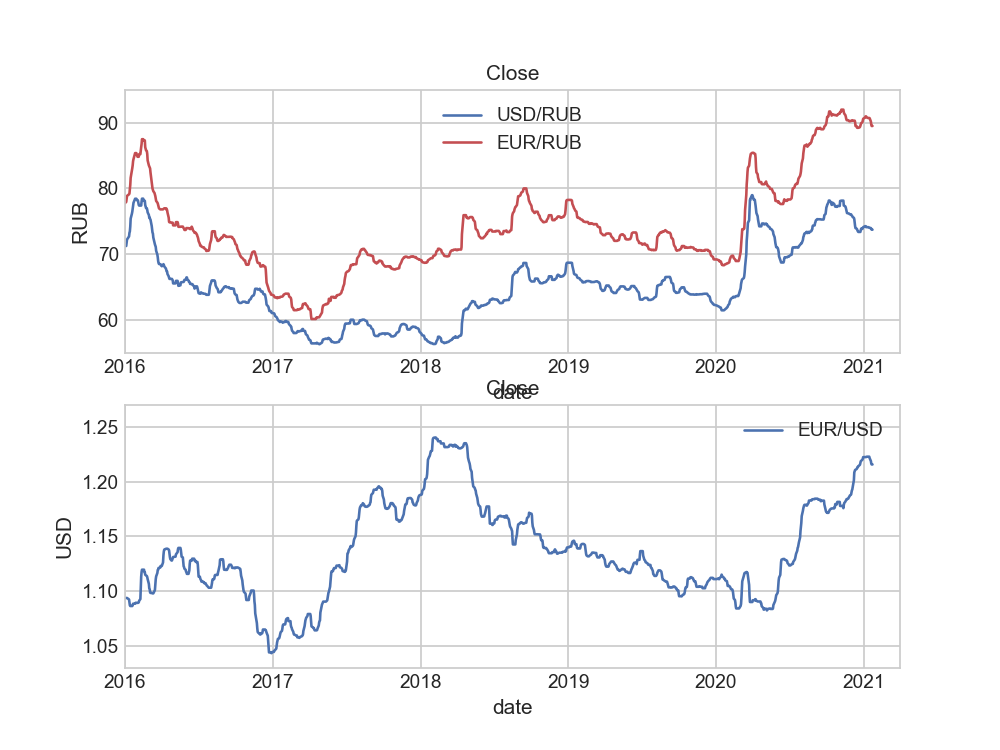

In [29]:
fig, ax = plt.subplots(2)
ax[0].plot(df_usd.index, df_usd["close"].rolling(window=10).median(),'b',label='USD/RUB')
ax[0].plot(df_eur.index, df_eur["close"].rolling(window=10).median(),'r',label='EUR/RUB')
ax[0].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(55,95), xlabel='date', ylabel='RUB', title='Close')
leg=ax[0].legend()
ax[1].plot(df_usd.index, (df_eur["close"]/df_usd["close"]).rolling(window=10).median(),'b',label='EUR/USD')
ax[1].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(1.03,1.27), xlabel='date', ylabel='USD', title='Close')
ax[1].legend()

In [30]:
q=usd.load_intraday_quotes()
q

IntradayQuote(instrument='USD000UTSTOM', last=75.395, num_trades=84501, is_trading=True, time=datetime.time(23, 7, 18))

In [31]:
merged=pd.concat([df_eur, df_usd], axis='columns', keys=["EUR","USD"], sort=True, verify_integrity=True)

In [32]:
merged

EUR                                                     \
               open     high      low   close num_trades        volume   
2003-04-15      NaN      NaN      NaN     NaN        NaN           NaN   
2003-04-16      NaN      NaN      NaN     NaN        NaN           NaN   
2003-04-17      NaN      NaN      NaN     NaN        NaN           NaN   
2003-04-18      NaN      NaN      NaN     NaN        NaN           NaN   
2003-04-21      NaN      NaN      NaN     NaN        NaN           NaN   
...             ...      ...      ...     ...        ...           ...   
2021-01-18  89.3700  89.7500  89.0000  89.420     7472.0  2.972061e+10   
2021-01-19  89.2625  89.7450  89.0650  89.335     7221.0  3.230904e+10   
2021-01-20  89.2750  89.3700  88.8200  88.960     8438.0  3.228866e+10   
2021-01-21  88.9025  89.9375  88.8375  89.845     8772.0  3.988895e+10   
2021-01-22  90.2050  91.6875  90.1050  91.620    12080.0  4.077414e+10   

                         USD                                        \
            waprice     open     high      low    close num_trades   
2003-04-15      NaN  31.1850  31.1975  31.1850  31.1970         55   
2003-04-16      NaN  31.1950  31.1950  31.1850  31.1885         65   
2003-04-17      NaN  31.1800  31.2000  31.1700  31.1975         63   
2003-04-18      NaN  31.1975  31.1975  31.1800  31.1801         51   
2003-04-21      NaN  31.1065  31.1100  31.1000  31.1025         47   
...             ...      ...      ...      ...      ...        ...   
2021-01-18  89.4458  74.0075  74.3800  73.7700  73.9950      62758   
2021-01-19  89.3977  73.8275  73.9350  73.2275  73.6800      54888   
2021-01-20  89.0461  73.6800  73.6875  73.2100  73.5200      54547   
2021-01-21  89.4275  73.2700  74.1000  73.2000  73.8450      65041   
2021-01-22  90.9051  74.0675  75.3625  74.0675  75.3000      95240   

                                   
                  volume  waprice  
2003-04-15  1.132583e+09  31.1912  
2003-04-16  7.289744e+08  31.1901  
2003-04-17  1.879374e+09  31.1872  
2003-04-18  1.053497e+09  31.1824  
2003-04-21  5.165712e+08  31.1019  
...                  ...      ...  
2021-01-18  2.227919e+11  74.1054  
2021-01-19  2.091162e+11  73.7512  
2021-01-20  1.895781e+11  73.4664  
2021-01-21  2.417367e+11  73.6693  
2021-01-22  3.415921e+11  74.7878  

[4426 rows x 14 columns]

In [33]:
(merged["EUR"]["close"]/merged["USD"]["close"]).dropna()

2005-06-20    1.220547
2005-06-21    1.208847
2005-06-22    1.213990
2005-06-23    1.207323
2005-06-24    1.206392
                ...   
2021-01-18    1.208460
2021-01-19    1.212473
2021-01-20    1.210011
2021-01-21    1.216670
2021-01-22    1.216733
Name: close, Length: 3902, dtype: float64

In [34]:
merged["EUR"][merged["EUR"]["open"].isna()]

,open,high,low,close,num_trades,volume,waprice
2003-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2005-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
moex.ShareInstrument("SBMX").load_intraday_quotes()

IntradayQuote(instrument='SBMX', last=1660.0, num_trades=1008, is_trading=False, time=datetime.time(18, 44, 45))

In [36]:
realty.load_intraday_quotes()

IntradayQuote(instrument='MREDC', last=0.0, num_trades=0, is_trading=False, time=datetime.time(18, 50))

In [37]:
df_realty

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2016-12-28,159646.69,159646.69,159646.69,159646.69,1,0.0,0.0
2017-01-04,158952.36,158952.36,158952.36,158952.36,1,0.0,0.0
2017-01-11,158470.18,158470.18,158470.18,158470.18,1,0.0,0.0
2017-01-18,157778.75,157778.75,157778.75,157778.75,1,0.0,0.0
2017-01-25,157832.09,157832.09,157832.09,157832.09,1,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-23,204029.43,204029.43,204029.43,204029.43,1,0.0,0.0
2020-12-30,205220.19,205220.19,205220.19,205220.19,1,0.0,0.0
2021-01-06,205331.12,205331.12,205331.12,205331.12,1,0.0,0.0


In [38]:
ser_realty_eur=(df_realty["close"]/df_eur["close"]).dropna()
ser_realty_usd=(df_realty["close"]/df_usd["close"]).dropna()
ser_realty_eur

date
2016-12-28    2541.942361
2017-01-04    2508.420878
2017-01-11    2510.021066
2017-01-18    2492.653738
2017-01-25    2467.282945
                 ...     
2020-12-23    2230.134499
2020-12-30    2242.414729
2021-01-06    2253.970965
2021-01-13    2286.889968
2021-01-20    2312.605441
Name: close, Length: 205, dtype: float64

In [39]:
ser_realty_eur.corr(df_eur["close"])

-0.6141508499940737

In [40]:
ser_realty_usd.corr(df_usd["close"])

-0.5133192061016171

In [41]:
df_realty["close"].corr(df_eur["close"])

0.7408114264004927

In [42]:
df_realty["close"].corr(df_usd["close"])

0.8262834923463804

In [43]:
ratio_eur=0.2
years=range(2017,2021)
corrs=pd.Series([df_realty[date(year,1,1):date(year,12,31)]["close"]
 .corr(ratio_eur*df_eur[date(year,1,1):date(year,12,31)]["close"]+
       (1.0-ratio_eur)*df_usd[date(year,1,1):date(year,12,31)]["close"]) 
 for year in years], index=years, name="corr m^2/ccy")
corrs

2017   -0.232455
2018    0.755216
2019   -0.654643
2020    0.634733
Name: corr m^2/ccy, dtype: float64

In [44]:
corrs.sum()

0.5028502774949566

In [45]:
ser_realty_eur.describe()

count     205.000000
mean     2331.638952
std       168.082364
min      2016.116415
25%      2204.263493
50%      2286.889968
75%      2479.355057
max      2661.668574
Name: close, dtype: float64

In [46]:
df_realty["close"].describe()

count       213.000000
mean     171840.201127
std       13925.366349
min      155408.840000
25%      158496.880000
50%      169302.810000
75%      182274.240000
max      205729.380000
Name: close, dtype: float64

In [47]:
ratio_in_usd=0.25
usdrub_buy=73.78
usdrub_sell=75
# how much more beneficial it would be to buy x% of full price using two diff. rates vs simple buying in roubles
hedge_via_predicted_sell=(ratio_in_usd*df_realty["close"]/usdrub_buy)*usdrub_sell - ratio_in_usd*df_realty["close"]
# if to sell $ at time of buying flat
hedge_via_observed_sell=(ratio_in_usd*df_realty["close"]/usdrub_buy)*df_usd["close"] - ratio_in_usd*df_realty["close"]
hedge_via_observed_sell=hedge_via_observed_sell.dropna()
hedged_realty_via_predicted_sell=df_realty["close"] - hedge_via_predicted_sell
hedged_realty_via_observed_sell=df_realty["close"] - hedge_via_observed_sell

In [48]:
hedge_via_predicted_sell.describe()

count    213.000000
mean     710.372206
std       57.566234
min      642.446411
25%      655.212095
50%      699.882855
75%      753.505600
max      850.467076
Name: close, dtype: float64

In [49]:
hedge_via_observed_sell.describe()

count     205.000000
mean    -5066.969621
std      3410.137714
min     -9420.193264
25%     -7735.150265
50%     -5912.634331
75%     -3788.382546
max      4408.359813
Name: close, dtype: float64

In [50]:
hedge_via_observed_sell

date
2016-12-28   -7273.142271
2017-01-04   -7174.184858
2017-01-11   -7535.012201
2017-01-18   -7602.378100
2017-01-25   -7627.677499
                 ...     
2020-12-23     898.747150
2020-12-30     441.565535
2021-01-06      99.145041
2021-01-13     -22.567657
2021-01-20    -181.247082
Name: close, Length: 205, dtype: float64

In [51]:
df_realty["close"]

date
2016-12-28    159646.69
2017-01-04    158952.36
2017-01-11    158470.18
2017-01-18    157778.75
2017-01-25    157832.09
                ...    
2020-12-23    204029.43
2020-12-30    205220.19
2021-01-06    205331.12
2021-01-13    204928.21
2021-01-20    205729.38
Name: close, Length: 213, dtype: float64

In [52]:
hedged_realty_via_observed_sell

date
2016-12-28    166919.832271
2017-01-04    166126.544858
2017-01-11    166005.192201
2017-01-18    165381.128100
2017-01-25    165459.767499
                  ...      
2020-12-23    203130.682850
2020-12-30    204778.624465
2021-01-06    205231.974959
2021-01-13    204950.777657
2021-01-20    205910.627082
Name: close, Length: 213, dtype: float64

In [53]:
5/205

0.024390243902439025

In [54]:
df_realty["close"].tail(1)*80*0.25/75.3/12

date
2021-01-20    4553.549801
Name: close, dtype: float64

In [55]:
df_usd["close"].tail(1)

date
2021-01-22    75.3
Name: close, dtype: float64

<IPython.core.display.Javascript object>


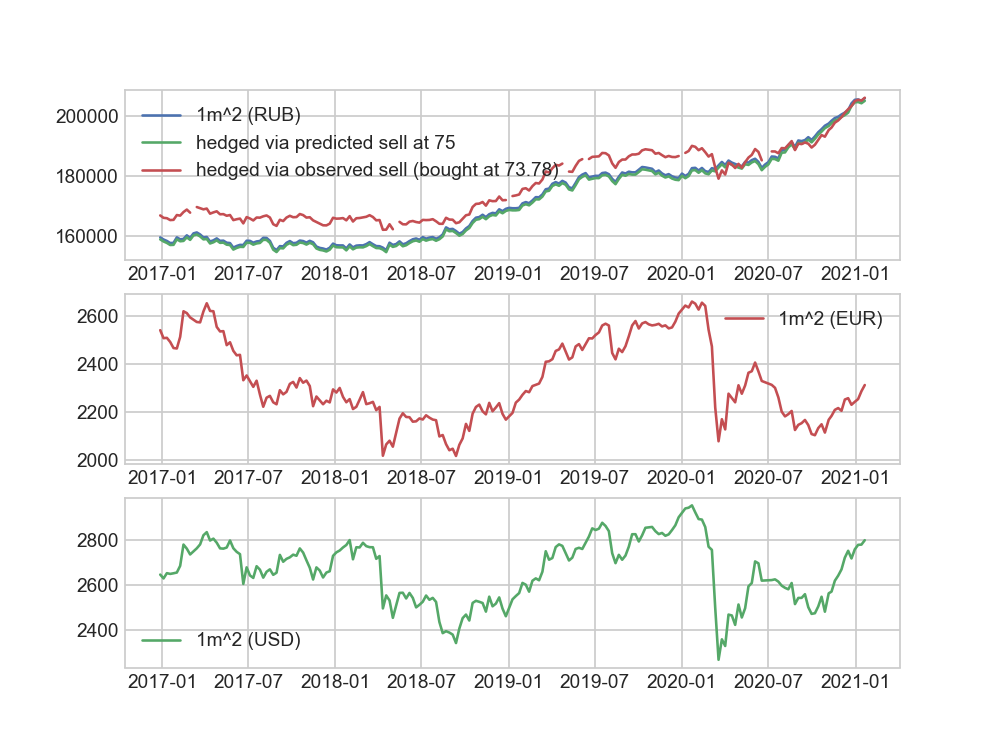

In [56]:
fig, ax = plt.subplots(3)
ax[0].plot(df_realty.index, df_realty["close"],'b',label='1m^2 (RUB)')
ax[0].plot(hedged_realty_via_predicted_sell.index, hedged_realty_via_predicted_sell, "g", label=f'hedged via predicted sell at {usdrub_sell}')
ax[0].plot(hedged_realty_via_observed_sell.index, hedged_realty_via_observed_sell, "r", label=f'hedged via observed sell (bought at {usdrub_buy})')
ax[0].legend()
ax[1].plot(ser_realty_eur.index, ser_realty_eur,'r',label='1m^2 (EUR)')
ax[1].legend()
ax[2].plot(ser_realty_usd.index, ser_realty_usd,'g',label='1m^2 (USD)')
ax[2].legend()

In [71]:
df_usd.pivot_table("close",index=df_usd.index.year, columns=df_usd.index.quarter, aggfunc="median")

date,1,2,3,4
date,,,,
2003,NaN,30.79000,30.40500,29.80225
2004,28.53000,28.98500,29.21500,28.66925
2005,27.92375,27.99250,28.53000,28.73250
2006,28.11250,27.07125,26.78500,26.65990
2007,26.26000,25.85500,25.52020,24.65625
2008,24.40500,23.63725,24.35450,27.36010
2009,34.67625,32.04100,31.39500,29.38975
2010,29.83250,30.53500,30.64750,30.70080
2011,29.27150,28.02450,28.93125,31.20750


<IPython.core.display.Javascript object>


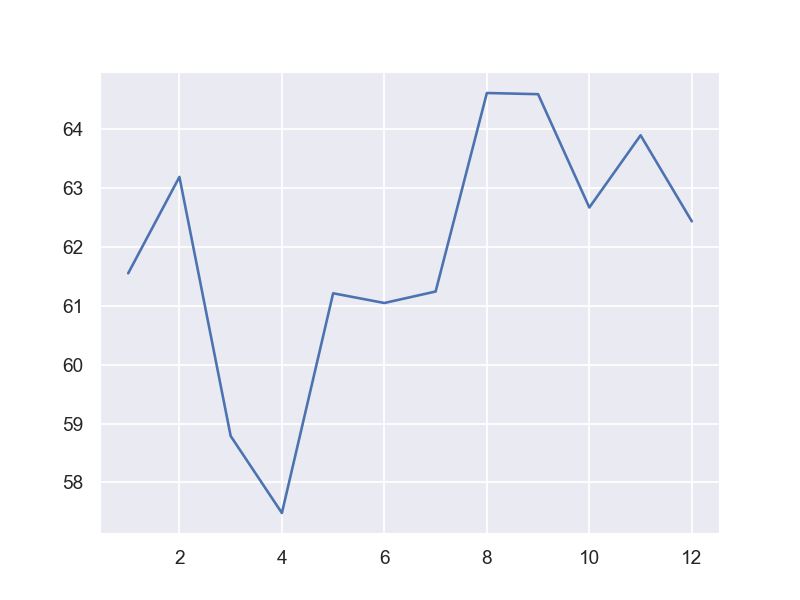

<AxesSubplot:>

In [76]:
#looks selling is better towards end of year
df_usd["2013":"2021"].groupby(lambda i: i.month).median()["close"].plot()

<IPython.core.display.Javascript object>


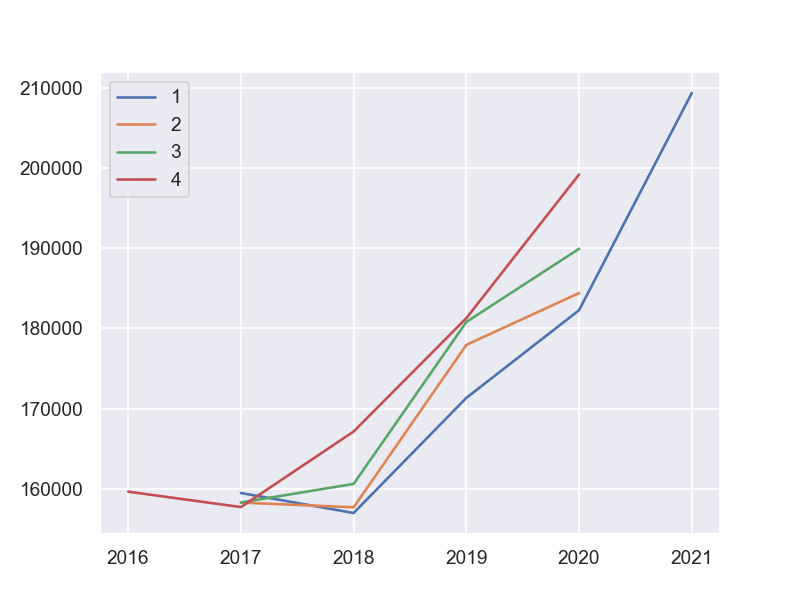

<AxesSubplot:>

In [83]:
# looks buying flat is always cheaper in the 1st quarter!
df_realty.groupby([lambda i:i.year, lambda i: i.quarter])["close"].median().unstack().plot()